# Greyscale Model for Leaf Image Classification Project

### Load Packages and Images

In [1]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

from tensorflow import keras
import random

In [2]:
EPOCHS = 2
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=1
root_directory = r"/Users/Shainan/Desktop/Leaf_Detection/data_all"

In [3]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        #image = Image.open(image_dir)
        #image = ImageOps.grayscale(image)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [4]:
image_list, label_list = [], []
try:
    print("Loading images ...")

    
    #DIRECTORY 1
    poison_ivy = "poison_ivy"
    directory1 = root_directory + "/" + poison_ivy    
    list_directory1 = listdir(directory1)
    
    for image in list_directory1[:200]:
        image_directory1 = f"{directory1}/{image}"        
        if image_directory1.endswith(".jpg") == True or image_directory1.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory1))
            label_list.append(poison_ivy)

    
    #DIRECTORY 2
    raspberry = "raspberry"
    directory2 = root_directory + "/" + raspberry
    list_directory2 = listdir(directory2)
    
    for image in list_directory2[:]:
        image_directory2 = f"{directory2}/{image}"
        if image_directory2.endswith(".jpg") == True or image_directory2.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory2))
            label_list.append(raspberry)
    
    
    #DIRECTORY 3
    potato = "potato"
    directory3 = root_directory + "/" + potato
    list_directory3 = listdir(directory3)
    
    for image in list_directory3[:]:
        image_directory3 = f"{directory3}/{image}"
        if image_directory3.endswith(".jpg") == True or image_directory3.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory3))
            label_list.append(potato)
    
    
    #DIRECTORY 4
    tomato = "tomato"
    directory4 = root_directory + "/" + tomato
    list_directory4 = listdir(directory4)
    
    for image in list_directory4[:]:
        image_directory4 = f"{directory4}/{image}"
        if image_directory4.endswith(".jpg") == True or image_directory4.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory4))
            label_list.append(tomato)
            
    #DIRECTORY 5
    bell_pepper = "bell_pepper"
    directory5 = root_directory + "/" + bell_pepper
    list_directory5 = listdir(directory5)
    
    for image in list_directory5[:]:
        image_directory5 = f"{directory5}/{image}"
        if image_directory5.endswith(".jpg") == True or image_directory5.endswith(".JPG") == True:
            image_list.append(convert_image_to_array(image_directory5))
            label_list.append(bell_pepper)
    
    
    print("Image loading completed")
except Exception as e:
    print(f"Error : {e}")

Loading images ...
Image loading completed


In [5]:
len(list_directory4)

1591

In [6]:
image_size = len(image_list)
print(image_size)

3639


### Create and Build Model

In [7]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer, open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [8]:
print(label_binarizer.classes_)
print(n_classes)

['bell_pepper' 'poison_ivy' 'potato' 'raspberry' 'tomato']
5


In [9]:
np_image_list = np.array(image_list, dtype=np.float16)

In [10]:
print("Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

Spliting data to train, test


In [11]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [12]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      320       
_________________________________________________________________
activation (Activation)      (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 85, 85, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 85, 85, 64)        0

In [14]:
#OPTIMIZE AND REDUCE LOSS
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
# train the network
print("training network...")

training network...


In [15]:
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=10, verbose=1
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
90/90 [==============================] - 175s 2s/step - loss: 0.1982 - accuracy: 0.8274 - val_loss: 2.7123 - val_accuracy: 0.3860
Epoch 2/10
90/90 [==============================] - 176s 2s/step - loss: 0.1079 - accuracy: 0.9083 - val_loss: 0.3479 - val_accuracy: 0.8324
Epoch 3/10
90/90 [==============================] - 210s 2s/step - loss: 0.0970 - accuracy: 0.9146 - val_loss: 0.4721 - val_accuracy: 0.7981
Epoch 4/10
90/90 [==============================] - 239s 3s/step - loss: 0.0739 - accuracy: 0.9284 - val_loss: 0.6989 - val_accuracy: 0.7184
Epoch 5/10
90/90 [==============================] - 216s 2s/step - loss: 0.0765 - accuracy: 0.9350 - val_loss: 0.2842 - val_accuracy: 0.8681
Epoch 6/10
90/90 [==============================] - 194s 2s/step - loss: 0.0601 - accuracy: 0.9476 - val_loss: 0.2083 - val_accuracy: 0.8929
Epoch 7/10
90/90 [==============================] - 188s 2s/step - loss: 0.056

### Plot Model Accuracy

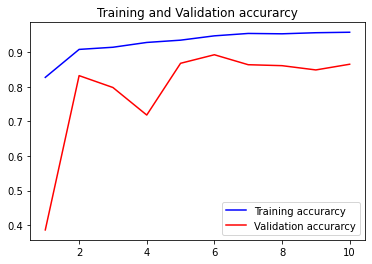

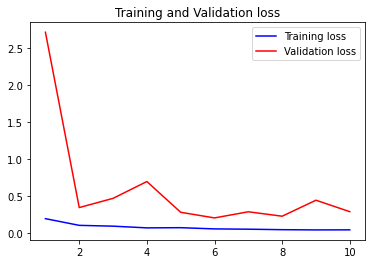

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [17]:
print("Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

Calculating model accuracy
23/23 [==============================] - 8s 344ms/step - loss: 0.2924 - accuracy: 0.8654
Test Accuracy: 86.53846383094788


In [19]:
#SAVE MODEL
model.save(root_directory + r"/project_model.h5")

In [20]:
#LOAD MODEL
model = keras.models.load_model(root_directory + r"/project_model.h5")

### Predict Image Classification

In [21]:
def choose_rand_image(directory):
    image_pred5_list = listdir(directory)    
    return (directory + '/' + random.choice(image_pred5_list))

In [22]:
def pred_image(image):
    im=convert_image_to_array(image)
    np_image_li = np.array(im, dtype=np.float16)
    npp_image = np.expand_dims(np_image_li, axis=0)
    result=model.predict(npp_image)
    
    print(image)
    print(result)
    itemindex = np.where(result==np.max(result))
    print("probability:"+str(np.max(result))+"\n"+label_binarizer.classes_[itemindex[1][0]])
    print()
    print()
    return(result)

In [131]:
image_pred1 = root_directory + r"/!testdata/poison_ivy/IMG_4627.jpg"
image_pred2 = root_directory + r"/!testdata/potato/ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG"
image_pred3 = root_directory + r"/!testdata/raspberry/IMG_4689.jpg"
image_pred4 = root_directory + r"/!testdata/tomato/6da1cf1b-a236-4d45-a390-dac6b65c45f7___GH_HL Leaf 264.JPG"
image_pred5 = choose_rand_image(root_directory + r"/!testdata/!random")

# print(image_pred5)
# print(choose_rand_image(r"C:\Users\marti\Downloads\data_all\data_all\!testdata\!random"))

In [132]:
pred_image(image_pred1);
pred_image(image_pred2);
pred_image(image_pred3);
pred_image(image_pred4);

/Users/shainan/Desktop/data_all//!testdata/poison_ivy/IMG_4627.jpg
[[1.0730887e-03 2.4726259e-07 4.4462995e-06 9.9892223e-01]]
probability:0.9989222
tomato


/Users/shainan/Desktop/data_all//!testdata/potato/ef7005dc-1d44-412e-b858-145a2d7a6fa9___RS_HL 1951.JPG
[[4.1929598e-04 4.1448846e-08 2.1510248e-10 9.9958068e-01]]
probability:0.9995807
tomato


/Users/shainan/Desktop/data_all//!testdata/raspberry/IMG_4689.jpg
[[9.9939108e-01 1.7240792e-06 3.6283116e-05 5.7091512e-04]]
probability:0.9993911
poison_ivy


/Users/shainan/Desktop/data_all//!testdata/tomato/6da1cf1b-a236-4d45-a390-dac6b65c45f7___GH_HL Leaf 264.JPG
[[7.2218102e-01 9.4765259e-05 4.3442966e-03 2.7337986e-01]]
probability:0.722181
poison_ivy




In [133]:
#RANDOM PICTURE SELECTED AND PREDICTED
image_pred5 = choose_rand_image(root_directory + r"/!testdata/!random")
pred_image(image_pred5);

/Users/shainan/Desktop/data_all//!testdata/!random/6e583c78-1f36-4d5e-bc0e-24f3c76a2c1d___RS_HL 0284.JPG
[[1.4234503e-13 4.7307452e-19 5.9926529e-24 1.0000000e+00]]
probability:1.0
tomato




In [134]:
#RANDOM PICTURE SELECTED AND PREDICTED
image_pred5 = choose_rand_image(root_directory + r"/!testdata/!random")
pred_image(image_pred5);

/Users/shainan/Desktop/data_all//!testdata/!random/IMG_4631.jpg
[[9.9999988e-01 4.3425082e-08 2.1937231e-12 1.4731876e-07]]
probability:0.9999999
poison_ivy




In [135]:
#RANDOM PICTURE SELECTED AND PREDICTED
image_pred5 = choose_rand_image(root_directory + r"/!testdata/!random")
pred_image(image_pred5);

/Users/shainan/Desktop/data_all//!testdata/!random/f30983c0-6e20-43cc-8672-4622ca34c830___RS_HL 1949.JPG
[[2.0533413e-09 2.2231021e-13 2.7098114e-16 1.0000000e+00]]
probability:1.0
tomato




In [136]:
#RANDOM PICTURE SELECTED AND PREDICTED
image_pred5 = choose_rand_image(root_directory + r"/!testdata/!random")
pred_image(image_pred5);

/Users/shainan/Desktop/data_all//!testdata/!random/IMG_4697.jpg
[[9.9273634e-01 8.8754547e-05 2.7076353e-03 4.4673090e-03]]
probability:0.99273634
poison_ivy




In [137]:
labels = ['poison_ivy','tomato','raspberry']

In [138]:
count = [label_list.count('poison_ivy'),label_list.count('tomato'),label_list.count('raspberry')]

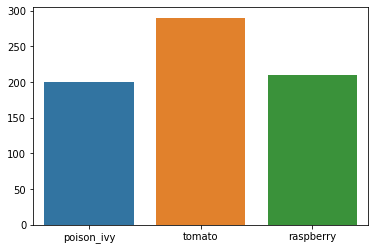

In [139]:
import seaborn as sns
sns.barplot(labels, count)
plt.show()

In [147]:
from PIL import Image, ImageOps
     
# creating a image1 object
im1 = Image.open(r"/Users/shainan/Desktop/data_all/poison_ivy/IMG_4187.JPG")

im1.show()

# applying greyscale method
im2 = ImageOps.grayscale(im1)
 
im2.show()